In [1]:
# Code for profiling the performance of attention

import torch
import torch.nn as nn
import time
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity
from fvcore.nn import FlopCountAnalysis
import torchprofile
import tracemalloc

input_lengths = [10, 100, 1000, 10000]#, 100000]
devices = ['cpu', 'cuda']
dim = 512

class AttentionModel(nn.Module):
    def __init__(self):
        super(AttentionModel, self).__init__()
        self.Q = nn.Linear(dim, dim)
        self.K = nn.Linear(dim, dim)
        self.V = nn.Linear(dim, dim)
        self.softmax = nn.Softmax(dim=2)

    def forward(self, input):
        return self.softmax((self.Q(input) @ self.K(input).transpose(1, 2)) / (dim ** 0.5)) @ self.V(input)


def attn_profiler(input_length, device='cpu'):
    device = torch.device(device)

    # Randomly sample words for the input sentence
    input = torch.randn(1, input_length, dim).to(device)
    model = AttentionModel().to(device)

    with torch.profiler.profile(
            activities=[
                torch.profiler.ProfilerActivity.CPU,
                torch.profiler.ProfilerActivity.CUDA],
            profile_memory=True,   
            record_shapes=True) as prof:
        # start = time.time()
        model(input)
        # end = time.time()

    start = time.time()
    for i in range(10):
        model(input)
    end = time.time()

    stats = prof.key_averages()
    cuda_memory_usage = sum([s.cuda_memory_usage for s in stats if s.cuda_memory_usage > 0])
    cpu_memory_usage = sum([s.cpu_memory_usage for s in stats if s.cpu_memory_usage > 0])
    memory_usage = cuda_memory_usage if device == torch.device('cuda') else cpu_memory_usage
    
    runtime = end - start
    flop_counter = FlopCountAnalysis(model, input)
    flops = flop_counter.total()
    
    print(f"Device: {device}, Input length: {input_length}, Time: {runtime:.2e}, FLOPS: {flops:.2e}, Memory: {memory_usage:.2e}")

    # del model

    return {
        "input_length": input_length,
        "device": device,
        "time": runtime,
        "flops": flops,
        "memory": memory_usage,        
    }


f:\Programs\anaconda3\envs\ssm_hw5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10000, Time: 2.36e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.19e+09


  0%|          | 0/100 [00:00<?, ?it/s]Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05


Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)


Device: cuda, Input length: 10, Time: 2.05e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.20e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.49e-02, FLOPS: 1.81e+09, Memory: 3.64e+07


Unsupported operator aten::softmax encountered 1 time(s)


Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  1%|          | 1/100 [00:03<05:14,  3.18s/it]Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10000, Time: 2.36e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09
Device: cpu, Input length: 10, Time: 5.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.17e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 1000, Time: 4.40e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  2%|▏         | 2/100 [00:06<05:09,  3.16s/it]

Device: cpu, Input length: 10000, Time: 2.32e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.05e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.48e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  3%|▎         | 3/100 [00:09<05:14,  3.25s/it]Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)


Device: cpu, Input length: 10000, Time: 2.39e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.02e-03, FLOPS: 1.10e+11, Memory: 2.17e+09
Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05


Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cuda, Input length: 10, Time: 2.53e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.67e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.59e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  4%|▍         | 4/100 [00:12<05:06,  3.19s/it]Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)


Device: cpu, Input length: 10000, Time: 2.31e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.54e-03, FLOPS: 1.10e+11, Memory: 2.17e+09
Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05


Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.71e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.24e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  5%|▌         | 5/100 [00:15<05:02,  3.18s/it]

Device: cpu, Input length: 10000, Time: 2.30e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.44e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.28e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  6%|▌         | 6/100 [00:19<05:00,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.68e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.17e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.22e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  7%|▋         | 7/100 [00:22<04:57,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.67e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  8%|▊         | 8/100 [00:25<04:57,  3.23s/it]

Device: cpu, Input length: 10000, Time: 2.36e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.17e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.24e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.09e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
  9%|▉         | 9/100 [00:28<04:56,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.30e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.17e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.07e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 10%|█         | 10/100 [00:32<04:51,  3.24s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.02e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.17e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 3.06e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 11%|█         | 11/100 [00:35<04:51,  3.28s/it]

Device: cpu, Input length: 10000, Time: 2.36e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.17e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 12%|█▏        | 12/100 [00:38<04:47,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.41e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 13%|█▎        | 13/100 [00:42<04:45,  3.29s/it]

Device: cpu, Input length: 10000, Time: 2.33e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.23e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 14%|█▍        | 14/100 [00:45<04:41,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.59e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 15%|█▌        | 15/100 [00:48<04:38,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.30e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.23e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 16%|█▌        | 16/100 [00:51<04:35,  3.28s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 3.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.60e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 17%|█▋        | 17/100 [00:55<04:30,  3.25s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 3.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.35e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 18%|█▊        | 18/100 [00:58<04:26,  3.25s/it]

Device: cpu, Input length: 10000, Time: 2.34e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.08e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 4.58e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 19%|█▉        | 19/100 [01:01<04:22,  3.24s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.06e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.53e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 20%|██        | 20/100 [01:04<04:20,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.31e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.65e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 21%|██        | 21/100 [01:08<04:17,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.70e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 22%|██▏       | 22/100 [01:11<04:13,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.56e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.18e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.50e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.56e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 23%|██▎       | 23/100 [01:14<04:14,  3.31s/it]

Device: cpu, Input length: 10000, Time: 2.36e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.56e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 24%|██▍       | 24/100 [01:18<04:09,  3.29s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.69e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 25%|██▌       | 25/100 [01:21<04:04,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.69e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 3.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.43e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 3.07e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 26%|██▌       | 26/100 [01:24<04:03,  3.29s/it]

Device: cpu, Input length: 10000, Time: 2.33e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.16e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.24e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.15e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 27%|██▋       | 27/100 [01:27<04:01,  3.31s/it]

Device: cpu, Input length: 10000, Time: 2.30e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.36e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.06e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 28%|██▊       | 28/100 [01:31<03:57,  3.30s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.06e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.64e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 29%|██▉       | 29/100 [01:34<03:53,  3.29s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.10e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.69e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 30%|███       | 30/100 [01:37<03:47,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 31%|███       | 31/100 [01:40<03:43,  3.24s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.66e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.07e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.24e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 32%|███▏      | 32/100 [01:44<03:39,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.67e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 33%|███▎      | 33/100 [01:47<03:37,  3.25s/it]

Device: cpu, Input length: 10000, Time: 2.35e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.09e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.12e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 34%|███▍      | 34/100 [01:50<03:35,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.55e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 35%|███▌      | 35/100 [01:53<03:30,  3.24s/it]

Device: cpu, Input length: 10000, Time: 2.29e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.02e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.13e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 36%|███▌      | 36/100 [01:57<03:26,  3.23s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.27e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.10e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 37%|███▋      | 37/100 [02:00<03:23,  3.24s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.56e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.56e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 38%|███▊      | 38/100 [02:03<03:22,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.35e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.06e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.66e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.41e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 39%|███▉      | 39/100 [02:06<03:18,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.70e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.50e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 1.53e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 40%|████      | 40/100 [02:10<03:15,  3.25s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 41%|████      | 41/100 [02:13<03:13,  3.27s/it]

Device: cpu, Input length: 10000, Time: 2.40e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 3.56e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.25e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 42%|████▏     | 42/100 [02:16<03:08,  3.26s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.59e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 43%|████▎     | 43/100 [02:19<03:04,  3.23s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.16e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.33e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 44%|████▍     | 44/100 [02:23<03:00,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.95e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 45%|████▌     | 45/100 [02:26<02:56,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.18e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.09e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 46%|████▌     | 46/100 [02:29<02:53,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.14e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.60e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 47%|████▋     | 47/100 [02:32<02:49,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.61e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.41e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 48%|████▊     | 48/100 [02:35<02:47,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.70e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.33e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 49%|████▉     | 49/100 [02:39<02:43,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.06e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 50%|█████     | 50/100 [02:42<02:39,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.71e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.60e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 51%|█████     | 51/100 [02:45<02:37,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.70e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.08e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 52%|█████▏    | 52/100 [02:48<02:33,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 53%|█████▎    | 53/100 [02:51<02:30,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.11e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.69e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.36e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.55e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 54%|█████▍    | 54/100 [02:55<02:27,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.08e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.13e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.36e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 55%|█████▌    | 55/100 [02:58<02:25,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.34e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.53e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 56%|█████▌    | 56/100 [03:01<02:21,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.03e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 57%|█████▋    | 57/100 [03:04<02:18,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 58%|█████▊    | 58/100 [03:08<02:15,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.43e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 59%|█████▉    | 59/100 [03:11<02:11,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.18e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.61e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 4.61e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 60%|██████    | 60/100 [03:14<02:08,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.10e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.33e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 61%|██████    | 61/100 [03:17<02:05,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.19e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.33e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.01e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 62%|██████▏   | 62/100 [03:20<02:01,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.19e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 63%|██████▎   | 63/100 [03:24<01:58,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 64%|██████▍   | 64/100 [03:27<01:55,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.53e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.74e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.52e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.43e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.10e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 65%|██████▌   | 65/100 [03:30<01:52,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.58e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 66%|██████▌   | 66/100 [03:33<01:48,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.43e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 67%|██████▋   | 67/100 [03:36<01:45,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.02e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 68%|██████▊   | 68/100 [03:40<01:42,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.61e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.31e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 69%|██████▉   | 69/100 [03:43<01:39,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 7.76e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.05e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.71e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.23e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 70%|███████   | 70/100 [03:46<01:35,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.08e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.38e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.10e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 71%|███████   | 71/100 [03:49<01:32,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 3.05e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.13e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 72%|███████▏  | 72/100 [03:52<01:30,  3.22s/it]

Device: cpu, Input length: 10000, Time: 2.32e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.09e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.67e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 73%|███████▎  | 73/100 [03:56<01:26,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.02e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.19e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 74%|███████▍  | 74/100 [03:59<01:23,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.11e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.51e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 75%|███████▌  | 75/100 [04:02<01:20,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.05e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.27e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 1.53e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 76%|███████▌  | 76/100 [04:05<01:16,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.67e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 77%|███████▋  | 77/100 [04:08<01:13,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.18e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.19e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 78%|███████▊  | 78/100 [04:12<01:10,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.57e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.27e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 1.52e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 79%|███████▉  | 79/100 [04:15<01:07,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.71e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.06e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.36e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 80%|████████  | 80/100 [04:18<01:04,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.60e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.15e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.39e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 81%|████████  | 81/100 [04:21<01:00,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.55e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.18e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.33e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 82%|████████▏ | 82/100 [04:24<00:57,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.69e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.54e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 83%|████████▎ | 83/100 [04:28<00:54,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.65e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.58e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.18e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.10e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 84%|████████▍ | 84/100 [04:31<00:51,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.65e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.60e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.31e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.14e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 85%|████████▌ | 85/100 [04:34<00:47,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.05e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.36e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 86%|████████▌ | 86/100 [04:37<00:44,  3.18s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.54e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.22e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.58e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.41e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.55e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 87%|████████▋ | 87/100 [04:40<00:41,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.03e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.30e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 88%|████████▊ | 88/100 [04:43<00:38,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.56e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.66e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.24e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.05e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 89%|████████▉ | 89/100 [04:47<00:35,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.28e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.53e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.68e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.41e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 90%|█████████ | 90/100 [04:50<00:31,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.07e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.07e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.40e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 91%|█████████ | 91/100 [04:53<00:28,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.58e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.72e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.54e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.28e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 92%|█████████▏| 92/100 [04:56<00:25,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.11e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 93%|█████████▎| 93/100 [05:00<00:22,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.30e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.52e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.10e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.30e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 5.11e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 94%|█████████▍| 94/100 [05:03<00:19,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.59e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 3.57e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.07e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.04e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 95%|█████████▌| 95/100 [05:06<00:16,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.61e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.03e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.54e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 96%|█████████▌| 96/100 [05:09<00:12,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 5.64e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.03e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 8.66e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.35e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.54e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 97%|█████████▋| 97/100 [05:12<00:09,  3.19s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.16e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 4.58e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.34e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.04e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 98%|█████████▊| 98/100 [05:16<00:06,  3.21s/it]

Device: cpu, Input length: 10000, Time: 2.27e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 1.53e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.54e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 9.15e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.05e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.29e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 4.58e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
 99%|█████████▉| 99/100 [05:19<00:03,  3.20s/it]

Device: cpu, Input length: 10000, Time: 2.25e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.04e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)


Device: cpu, Input length: 10, Time: 4.08e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cuda, Input length: 10, Time: 2.04e-03, FLOPS: 7.97e+06, Memory: 1.66e+05
Device: cpu, Input length: 100, Time: 1.02e-02, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cuda, Input length: 100, Time: 2.55e-03, FLOPS: 8.89e+07, Memory: 1.84e+06
Device: cpu, Input length: 1000, Time: 4.44e-02, FLOPS: 1.81e+09, Memory: 3.64e+07
Device: cuda, Input length: 1000, Time: 2.03e-03, FLOPS: 1.81e+09, Memory: 3.69e+07


Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
Unsupported operator aten::div encountered 1 time(s)
Unsupported operator aten::softmax encountered 1 time(s)
100%|██████████| 100/100 [05:22<00:00,  3.22s/it]


Device: cpu, Input length: 10000, Time: 2.26e+00, FLOPS: 1.10e+11, Memory: 2.16e+09
Device: cuda, Input length: 10000, Time: 2.03e-03, FLOPS: 1.10e+11, Memory: 2.17e+09


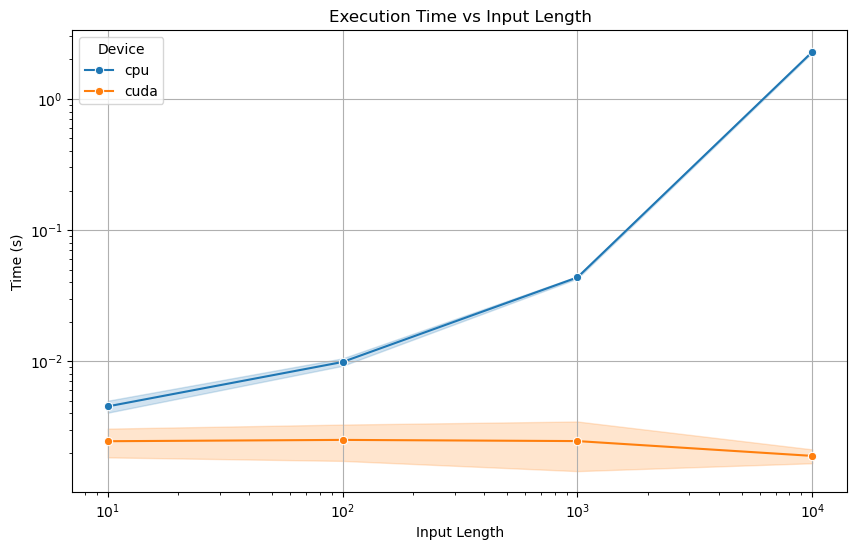

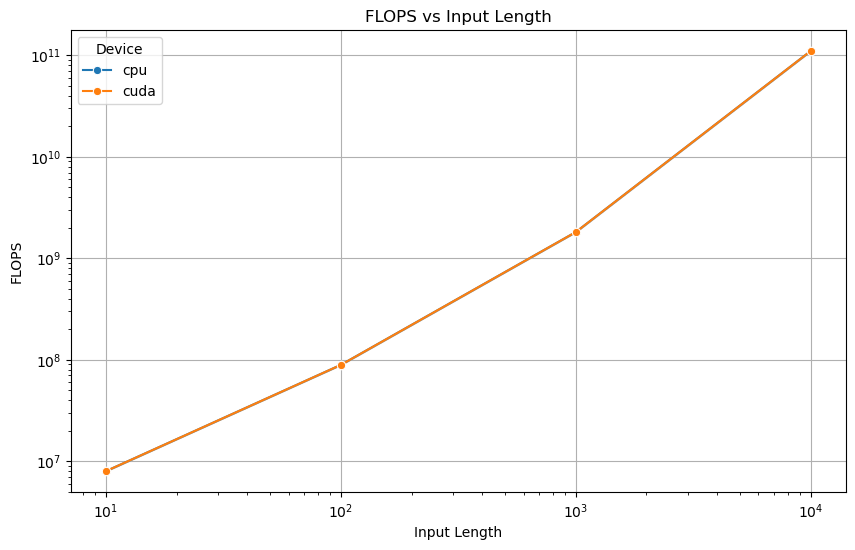

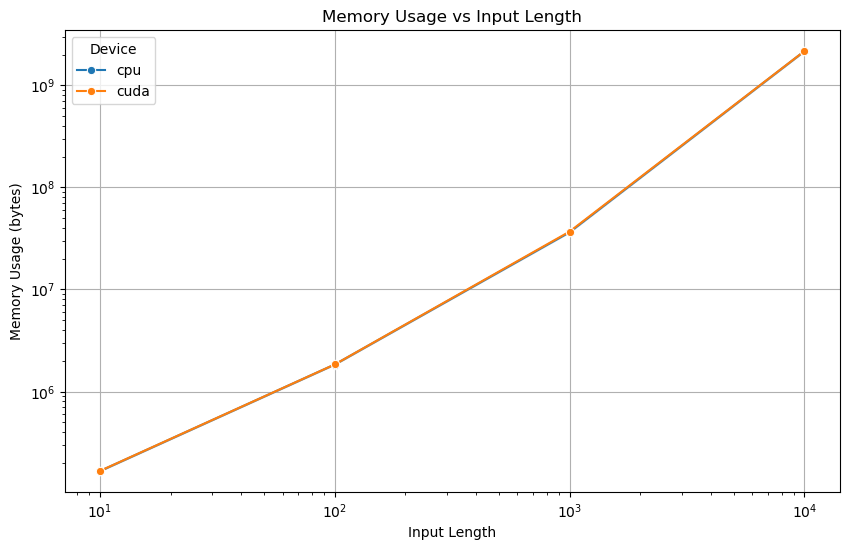

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

# Do a warmup run 
attn_profiler(10000)
attn_profiler(10000, 'cuda')

# Initialize lists to store results
results = []

# Run the profiler 100 times for each input length and device, and store the results
for i in tqdm.tqdm(range(100)):
    for input_length in input_lengths:
        for device in devices:
            result = attn_profiler(input_length, device)  # Result is a dictionary
            results.append(result)  # Append the whole result dictionary to the list

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(results)

# Plotting time, FLOPS, and memory separately with error bars
metrics = ['time', 'flops', 'memory']
titles = {
    'time': 'Execution Time vs Input Length',
    'flops': 'FLOPS vs Input Length',
    'memory': 'Memory Usage vs Input Length'
}
y_labels = {
    'time': 'Time (s)',
    'flops': 'FLOPS',
    'memory': 'Memory Usage (bytes)'
}

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df,
        x='input_length', 
        y=metric, 
        hue='device', 
        errorbar='sd',  
        marker='o'
    )
    
    plt.title(titles[metric])
    plt.xlabel('Input Length')
    plt.ylabel(y_labels[metric])
    plt.xscale('log')  
    plt.yscale('log')
    plt.legend(title='Device')
    plt.grid(True)
    plt.show()